In [1]:
from collections import Counter
from string import ascii_uppercase 
import matplotlib.pyplot as plt
from typing import List, Tuple
from tabulate import tabulate
import string

# Utils

In [2]:
def letter_distribution(text: str) -> List[Tuple[str, int]]:
    return sorted(Counter(text).items(), key=lambda x: x[1], reverse=True)


def plot_freq(freq: List[Tuple[str, int]], file_name: str, title: str ="title") -> None:
    labels, values = zip(*freq)
    bar_width = 0.35
    x_positions = range(len(labels))
    plt.bar(x_positions, values, width=bar_width, color='green')
    plt.xlabel('Letters')
    plt.ylabel('Frequencies')
    plt.title(f'{title}')
    plt.xticks(x_positions, labels)
    plt.savefig(f"viz_distribution/{file_name}", format='pdf')
    plt.show()

        
def ic(text: str):
    alphabet = string.ascii_letters.upper()
    letter_freq = Counter(text.upper())
    summation = 0
    text_size = 0
    for letter, freq in letter_freq.items():
        if letter in alphabet:
            summation += freq ** 2 - freq
            text_size += freq
    return summation, summation/(text_size * (text_size-1) )


def create_substrings(string: str, n: int) -> List[str]:
    substrings = [[] for _ in range(n)]
    for i, char in enumerate(string):
        index = i % n
        substrings[index].append(char)
    result = ["".join(substring) for substring in substrings]
    return result 


def guess_keylen(ciphered_text: str, rounds=10) -> None:
    for i in range(1, rounds):
        subs = create_substrings(ciphered_text, i)
        str_to_print, c = "", 0
        for substring in subs:
            _, indicie_coin = ic(substring)
            str_to_print += f"{indicie_coin:.3f} "
            
        for value in str_to_print.split():
            c += float(value)
        mean = c / len(str_to_print.split())
        print(f"[{i}] [mean = {mean:.4f}] {str_to_print}")


def pprint(letters: str, most_common_letter: str, most_frequency_of_each_substring: str) -> None:
    table = []
    w_index = letters.index(most_common_letter)
    for string in most_frequency_of_each_substring:
        idx = letters.index(string)
        distance_to_e = idx - w_index
        letter_at_distance = letters[distance_to_e]
        table.append([string, most_common_letter, letter_at_distance, 
                    idx, w_index, distance_to_e])

    headers = ["Most \nfreq. letter \nin substring", "Most freq. \nletter in English", "Distance to E", "Index", "letter \nE index", "Letter at distance"]
    print(tabulate(table, headers=headers))

# Freq

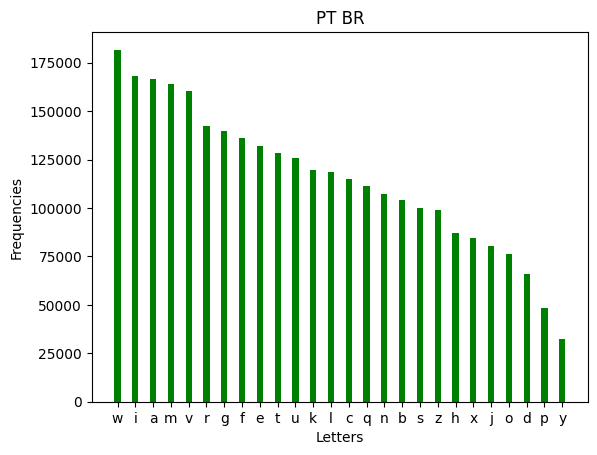

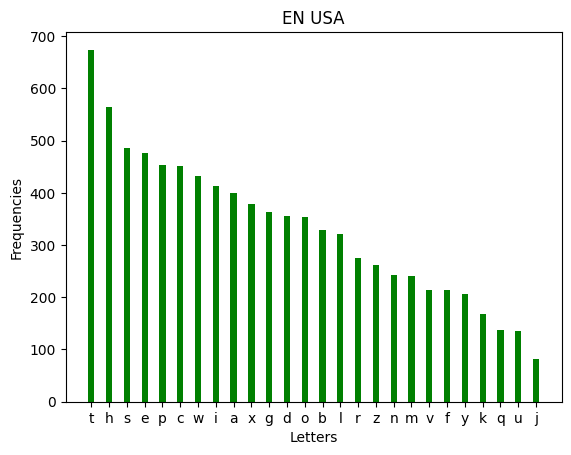

In [3]:
cipher_ptbr = open("ciphered_texts/cipher1.txt", "r").read()
freq_cipher_ptbr_list = letter_distribution(cipher_ptbr)

cipher_text = open("ciphered_texts/ciphertext.txt", "r").read()
freq_cipher_list = letter_distribution(cipher_text)

plot_freq(freq_cipher_ptbr_list, "pt-br_file.pdf", title="PT BR")
plot_freq(freq_cipher_list, "EN-USA_file.pdf", title="EN USA")

# Vigenere

Tem dois metodos para descobrir o tamanho da chave

1. Kasiski
2. Index of Coincidence  
2.1. pegar

## Guess keylen

In [4]:
guess_keylen(cipher_text)

[1] [mean = 0.0450] 0.045 
[2] [mean = 0.0450] 0.045 0.045 
[3] [mean = 0.0450] 0.045 0.045 0.045 
[4] [mean = 0.0452] 0.045 0.045 0.045 0.046 
[5] [mean = 0.0664] 0.067 0.068 0.066 0.064 0.067 
[6] [mean = 0.0453] 0.045 0.046 0.045 0.045 0.045 0.046 
[7] [mean = 0.0451] 0.045 0.045 0.046 0.045 0.044 0.045 0.046 
[8] [mean = 0.0451] 0.045 0.044 0.045 0.045 0.045 0.045 0.044 0.048 
[9] [mean = 0.0453] 0.045 0.046 0.045 0.046 0.045 0.046 0.044 0.045 0.046 


## Next step: split in guessed shifts


cpimvtcmngiheycgremhwlt... <= parte inicial do texto cifrado 



**[C]** pimv **[T]** cmng **[I]** heyc **[G]** remh **[W]** lt ... => CTIGW

In [5]:
five_strings = create_substrings(cipher_text, 5)
for i, fs in enumerate(five_strings):
    print(i+1, fs)

1 ctigwtqhwgiipscwdxsxwgipadrsxwdwvdrpvqigbxccneciagstdwsxudxgbwaxgwiwjxwiuwjiwgwhtcphxsahesutcuwtddwjkdwtihgvwdwddugjksiaaixtigidrtpatjgttttibuwvdrptsixdwhpcpjkpwvjldjwvscqcgqhipctbdxpxhdqhpichirprtdtdiusnhhhicpibpgkguwhsuewaehxtvdaxtrpcpdjkgcphpzwadtitrbtvwtcbwpwhshwwptchtsngtacidtpijiripcsgwcwdepwedghcdtghpcwdspasagxgaidwvdttqdjxxviduwbcwtdxcilppetbiidwidpdpdgtixexhatvswdxigtnjxbniwaixewgdiwghhspdthpbicrcixawddnchttdcdupsphitxatzzdttpsswtpwtcgtxtqlhtudiwcltdqcxrpisgvcjitilicpgiactsdpvturgaexdxghcpdrlcbcddpcptgaxschsdnwtiuwutcejxhxtndvwagtxgccidstkapdxtwvhhhgihshpptxipuwtgrcidvpwwwxxehxxxtgbuprehswghhjixztwvpijnthqcextwtbutxwgihiiuwgciehjstdcshcputaanpctwtxginjepmchisiqrqjcxjwvbxttkaepvitpxrgsrhxpiahtiuwixltdaraxddbtxpgndbxbpbxchctcppntkawighcttcxhxrpaiwccwtxbxgcpvzpxepxepcstdpvsxirpagsvdthpgcndjwaxrpwngoidcrtgierpriktiaptgcwprcdrpbrdcpvntggcbtaipahithuxldxxwesbulttbtigstsjitccdpdisdnwtgwgstxdierlbswicxthdspicrdgtwdhpsitktctcphxpbaxtitwijbstacjawxxdxaakcxtcarhhppwtudpahpkjqptidzlwpwc

In [6]:
letters = [str_ for str_ in ascii_uppercase]
def encode_vigenere(plain_text, key):
    plain_text = plain_text.upper()
    key = key.upper()
    cipher_text = ""
    for i, char in enumerate(plain_text):
        index = i % len(key)
        key_char = key[index]
        key_index = letters.index(key_char)
        char_index = letters.index(char)
        new_index = (char_index + key_index) % 26
        cipher_text += letters[new_index]
    return cipher_text

def decode_vigenere(cipher_text, key):
    plain_text = ""
    cipher_text = cipher_text.upper()
    key = key.upper()
    for i, char in enumerate(cipher_text):
        index = i % len(key)
        key_char = key[index]
        key_index = letters.index(key_char)
        char_index = letters.index(char)
        new_index = (char_index - key_index) % 26
        plain_text += letters[new_index]
    return plain_text

## Substring frequency

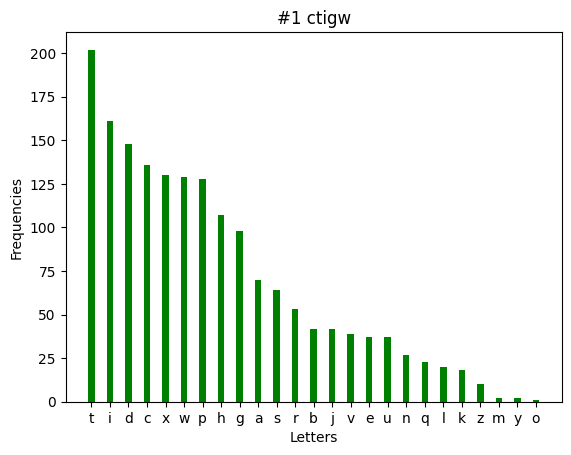

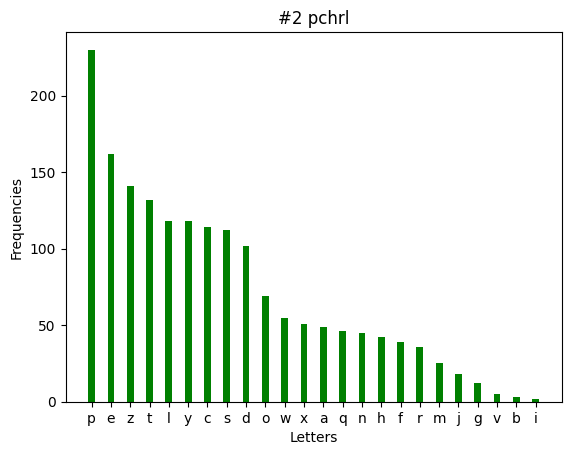

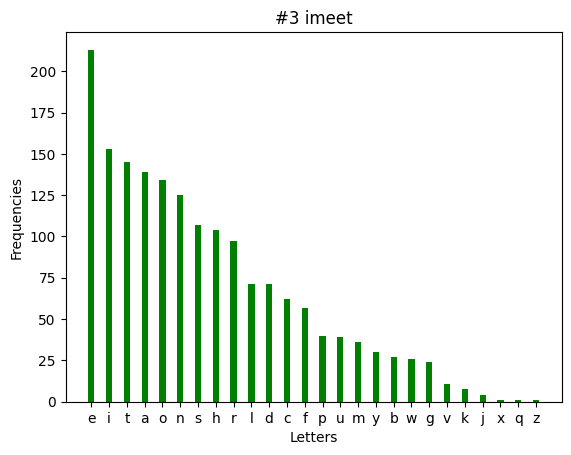

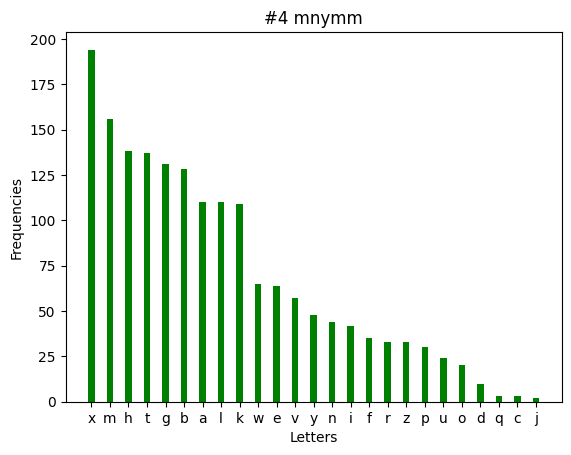

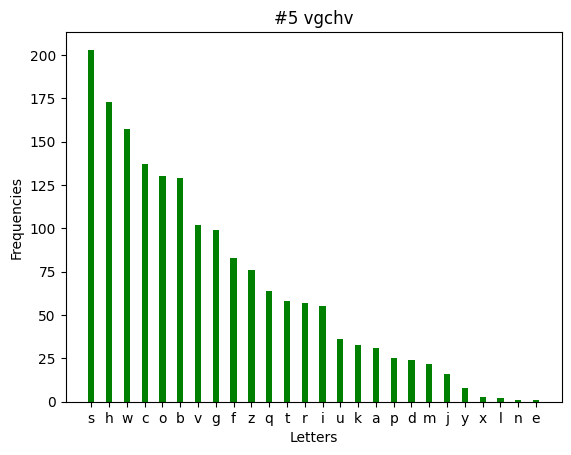

In [7]:
most_frequency_of_each_substring = list()
for i, substr in enumerate(five_strings):
    sample_substr = substr[:5]
    substr = letter_distribution(substr)
    letter, count = substr[0]
    most_frequency_of_each_substring.append( letter.upper() )
    plot_freq(substr, file_name=f"substrings/english_substring_{i}.pdf", title=f"#{i+1} {sample_substr}")

In [8]:
most_frequency_of_each_substring

['T', 'P', 'E', 'X', 'S']

In [9]:
most_common_letter_in_english = "E"
pprint(letters, most_common_letter_in_english, most_frequency_of_each_substring)

Most             Most freq.           Distance to E      Index    letter     Letter at distance
freq. letter     letter in English                                E index
in substring
---------------  -------------------  ---------------  -------  ---------  --------------------
T                E                    P                     19          4                    15
P                E                    L                     15          4                    11
E                E                    A                      4          4                     0
X                E                    T                     23          4                    19
S                E                    O                     18          4                    14


In [10]:
decoded = decode_vigenere(cipher_text, "PLATO")
decoded[:100]

'NEITHERMUSTWEFORGETTHATTHEREPUBLICISBUTTHETHIRDPARTOFASTILLLARGERDESIGNWHICHWASTOHAVEINCLUDEDANIDEAL'

In [11]:
with open("deciphered_texts/plaintext_of_ciphertext.txt", "w") as f:
    f.write(decoded)